In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clothes = pd.read_csv('clothes.csv')
furniture = pd.read_csv('furniture.csv')
paper = pd.read_csv('paper.csv')
clothes.head()

,Name,Consumptionpercapita,GWP_clothes
0,Belgisch Park,17.364118,31.507165
1,Westbroekpark,17.081050,30.993538
2,Duttendel,16.936491,30.731236
3,Nassaubuurt,14.746307,26.757151
4,Uilennest,16.736509,30.368369


In [3]:
lci_data = pd.merge(clothes,furniture,on=['Name'],how='inner')
lci_data = lci_data.merge(paper,on=['Name'],how='inner')
lci_data.head()
lci_data['total_gwp'] = lci_data['GWP_clothes'] + lci_data['GWP_furniture'] + lci_data['GWP_paper']
lci_data = lci_data.sort_values(by=['total_gwp'],ascending=False)
lci_data = lci_data.reset_index(drop=True)
buurts = lci_data.loc[0:10,'Name']
env_impact = lci_data.loc[0:10,'total_gwp']

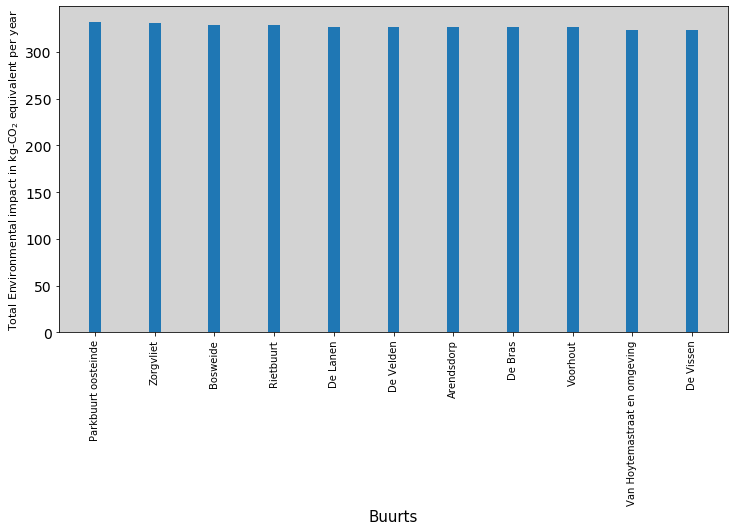

In [4]:
plt.figure(figsize=(12,6))
ax=plt.axes()
plt.bar(buurts,env_impact,width=0.2)
plt.xlabel('Buurts',fontsize=15)
plt.ylabel(r'Total Environmental impact in kg-CO$_2$ equivalent per year',fontsize=11)
#plt.ylim(0,1300)
#plt.xlim(0,20)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
ax.set_facecolor('lightgray')
plt.savefig('Most_impact.png')

In [5]:
hague_data = pd.read_excel('Hague_data.xlsx')
hague_data = hague_data[["Naam van het gebied","Aantal inwoners",'Gemiddeld inkomen per inwoner ','Actieven 15-75 jaar']]
hague_data.columns = ['Name','Population','Income per capita','activity_rate']
lci_data = lci_data.merge(hague_data,on=['Name'],how='inner')

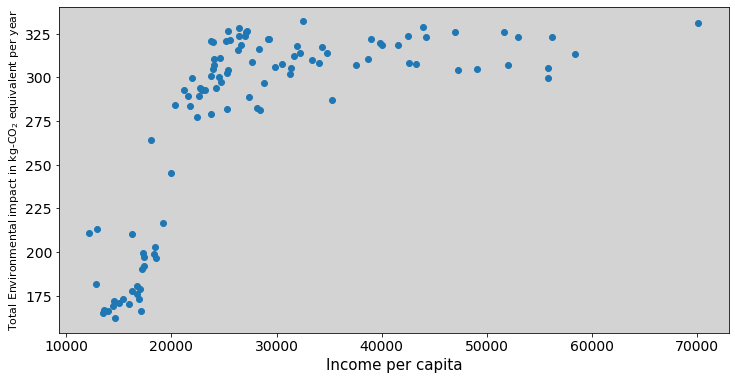

In [9]:
plt.figure(figsize=(12,6))
ax=plt.axes()
plt.scatter(lci_data['Income per capita'],lci_data['total_gwp'])
plt.xlabel('Income per capita',fontsize=15)
plt.ylabel(r'Total Environmental impact in kg-CO$_2$ equivalent per year',fontsize=11)
#plt.ylim(2350,3000)
#plt.xlim(0,70000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor('lightgray')

In [7]:
env_impacts = ['GWP_clothes','GWP_furniture','GWP_paper']
lci_data = lci_data.dropna()
lci_data = lci_data.reset_index()
curr_impact = 0
averaged_impact = []
population = 0
for impact in env_impacts:
    for i in range(0,len(lci_data)):
        curr_impact = curr_impact + (lci_data.loc[i,impact]*lci_data.loc[i,'Population'])
        population = population + lci_data.loc[i,'Population']
    average = curr_impact/population
    averaged_impact.append(average)
    curr_impact=0
    population = 0

In [8]:
averaged_impact

[28.10370755108756, 201.97370698056764, 33.250318301310486]